# First ML pipeline with AutoML

<!--<badge>--><a href="https://colab.research.google.com/github/kuennethgroup/colab_tutorials/blob/main/lecture2/first_ml_pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a><!--</badge>-->

In this tutorial, we'll use the `pandas` Python library to import a polymer dataset containing information on the tendency to crystalize for 432 polymers. After plotting the histogram of the dataset, we  use the `FLAML` Python library to train a machine learning model. Finally, we analyze the data using a parity plot.

#### AutoML with FLAML (A Fast Library for Automated Machine Learning & Tuning)

FLAML automates the training of machine learning models. It automatically finds high quality machine learning models for you by iterating through many machine learning model types and hyperparameters. 

Install: 
`pip install flaml[automl]`





### Analyze data


1. Use pandas to read the file `https://raw.githubusercontent.com/kuennethgroup/colab_tutorials/main/lecture2/data/polymers_tend_to_crystalize.json` into a pandas DataFrame with the name `df`.

2. Plot a histogram showing the frequencies of property value. Use 40 bins.


,smiles,property,value,fingerprint
0,[*]C[*],Xc,47.80,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,[*]CC([*])C,Xc,44.47,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,[*]CC([*])CC,Xc,34.04,"[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,[*]CC([*])CCC,Xc,20.01,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,[*]CC([*])CC(C)C,Xc,21.64,"[0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...
427,[*]C([*])(F)F,Xc,31.84,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
428,[*]C/C=C\C[*],Xc,25.58,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
429,[*]O[Si](C)(C)CCCC(=O)Oc1ccc(C=Nc2ccc(N=Cc3ccc...,Xc,29.05,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ..."
430,[*]O[Si](C)(C)CCCC(=O)Oc1ccc(C=Nc2ccc(Cc3ccc(N...,Xc,21.74,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ..."


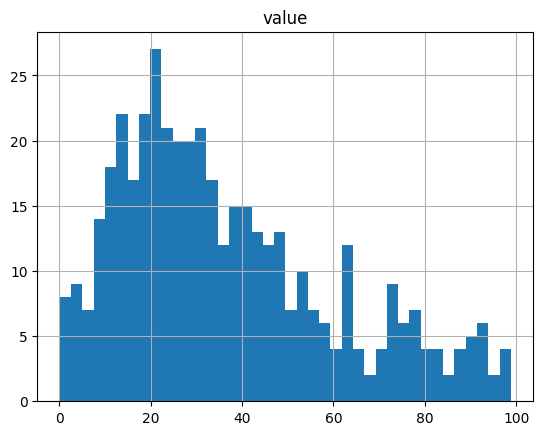

In [1]:
import pandas as pd
import numpy as np

df = pd.read_json(
    "https://raw.githubusercontent.com/kuennethgroup/colab_tutorials/main/lecture2/data/polymers_tend_to_crystalize.json"
)
df.hist("value", bins=40)
display(df)

### AutoML


Train a machine learning model using the AutoML capabilities of FLAML. Use the dataset loaded in the previous step for training the model. 

Hints:

- X_train = 'fingerprints'
- y_train = 'value'
- Check the documentation of `automl.fit()`
- Start with:
```python
from flaml import AutoML

automl = AutoML()

automl_settings = {
    "task": "regression",
    "starting_points": "data",
    "metric": "r2",
    "time_budget": 100,
    "max_iter": 50,
}

automl.fit(..., **automl_settings)

```

Note: Make sure FLAML is installed (`!pip install "flaml[automl]"`)

Metric 


$$\text{Mean squared error (MSE)} = \frac{1}{n} \sum_i^n (Y_i - \hat{Y}_i)^2; \quad Y_i = \text{truth}, \hat{Y} = \text{predictions}, n=\text{number of values}$$

In [10]:
# In case flaml is not installed execute
# !pip install -U "flaml[automl]"

from flaml import AutoML

automl = AutoML()
# Specify automl goal and constraint
X_train = np.vstack(df["fingerprint"])
y_train = df["value"].apply(float)




automl_settings = {
    "task": "regression",  # Classification (i.e., yes,no,maybe, etc.) is also possible
    "starting_points": "data",  # Some preselection helper of FLAML
    "metric": "mse",  # Goal is minimize the error (loss function). Measure with mean squared error (MSE). 
    "time_budget": 1000,
    "max_iter": 100,
}


automl.fit(X_train, y_train, **automl_settings)

[flaml.automl.logger: 10-24 14:37:13] {1679} INFO - task = regression
[flaml.automl.logger: 10-24 14:37:13] {1690} INFO - Evaluation method: cv
[flaml.automl.logger: 10-24 14:37:13] {1788} INFO - Minimizing error metric: mse
[flaml.automl.logger: 10-24 14:37:13] {103} WARNING - Starting points outside of the search space are removed. Remaining starting points for <class 'flaml.automl.model.LGBMEstimator'>: []
[flaml.automl.logger: 10-24 14:37:13] {103} WARNING - Starting points outside of the search space are removed. Remaining starting points for <class 'flaml.automl.model.RandomForestEstimator'>: []
[flaml.automl.logger: 10-24 14:37:13] {103} WARNING - Starting points outside of the search space are removed. Remaining starting points for <class 'flaml.automl.model.XGBoostSklearnEstimator'>: []
[flaml.automl.logger: 10-24 14:37:13] {103} WARNING - Starting points outside of the search space are removed. Remaining starting points for <class 'flaml.automl.model.XGBoostLimitDepthEstimato

[flaml.automl.logger: 10-24 14:37:14] {2344} INFO - Estimated sufficient time budget=12208s. Estimated necessary time budget=45s.
[flaml.automl.logger: 10-24 14:37:14] {2391} INFO -  at 1.2s,	estimator extra_tree's best error=430.5019,	best estimator extra_tree's best error=430.5019
[flaml.automl.logger: 10-24 14:37:14] {2218} INFO - iteration 1, current learner lgbm
[flaml.automl.logger: 10-24 14:37:14] {2391} INFO -  at 1.2s,	estimator extra_tree's best error=430.5019,	best estimator extra_tree's best error=430.5019
[flaml.automl.logger: 10-24 14:37:14] {2218} INFO - iteration 1, current learner lgbm
[flaml.automl.logger: 10-24 14:37:36] {2391} INFO -  at 23.7s,	estimator lgbm's best error=504.9949,	best estimator extra_tree's best error=430.5019
[flaml.automl.logger: 10-24 14:37:36] {2218} INFO - iteration 2, current learner xgboost
[flaml.automl.logger: 10-24 14:37:43] {2391} INFO -  at 30.4s,	estimator xgboost's best error=509.0867,	best estimator extra_tree's best error=430.5019


In [15]:
# Lower is better
automl.best_loss_per_estimator

{'extra_tree': 383.7364177657797,
 'lgbm': 417.2864475665563,
 'rf': 404.9475594999961,
 'xgboost': 476.10083604289895,
 'xgb_limitdepth': inf}

### Analyze prediction

Analyze the data using a parity plot of predictions and true values. Add a 45 degree dashed line to the parity plot.

Hints:
- Use `automl.predict` to get `y_pred`
- Use matplotlib for plotting: 

```python
plt.plot(y_pred, y_train, 'o')
plt.plot([0, 100], [0, 100], "--")
plt.ylabel("Train")
plt.xlabel("Predict"
```

Text(0.1, 0.8, 'MSE 383.736')

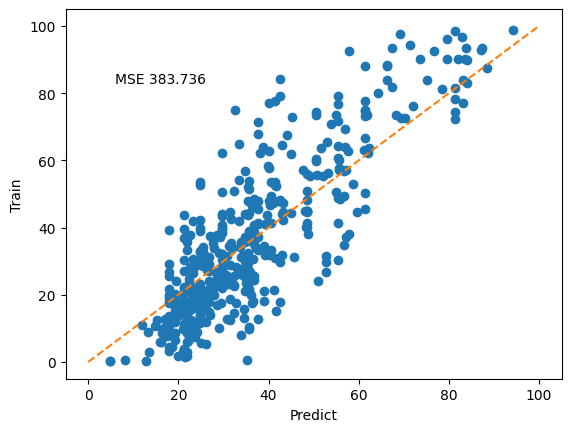

In [30]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1)

y_pred = automl.predict(X_train)

ax.plot(y_pred, y_train, "o")
ax.plot([0, 100], [0, 100], "--")
ax.set_ylabel("Train")
ax.set_xlabel("Predict")

ax.text(0.1, 0.8, f"MSE {automl.best_loss:.3f}", transform=ax.transAxes)

### Todo

Modify `automl_settings` to improve the prediction performance (reduce error)
- Increase `time_budget`
- Increase `max_iter`